In [43]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [44]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [45]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [46]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [47]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled = StandardScaler().fit_transform(df_market_data[[
    'price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d',
    'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y']])

In [48]:
# Create a DataFrame with the scaled data
df_market_transformed = pd.DataFrame(market_data_scaled, columns=['price_change_percentage_24h', 'price_change_percentage_7d', 'price_change_percentage_14d', 'price_change_percentage_30d',
    'price_change_percentage_60d', 'price_change_percentage_200d', 'price_change_percentage_1y'])

# Copy the crypto names from the original data
coin_id_column = df_market_data.index
# coin_id_column

# Set the coinid column as index
df_market_transformed['coin_id'] = coin_id_column
df_market_transformed = df_market_transformed.set_index('coin_id')

# # Display sample data
df_market_transformed.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [49]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 12))

In [50]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    model.fit(df_market_data)
    inertia.append(model.inertia_)

c:\Users\jraem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jraem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jraem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jraem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

c:\Users\jraem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jraem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jraem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jraem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [76]:
# Create a dictionary with the data to plot the Elbow curve
elbow = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow)
df_elbow.head()

,k,inertia
0,1,6.998354e+07
1,2,8.193204e+06
2,3,2.592707e+06
3,4,8.352274e+05
4,5,4.658120e+05


In [52]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.hvplot.line(x='k', y='inertia', title='Elbow Curve', xticks=k)

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 3

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [100]:
# Initialize the K-Means model using the best value for k
k_model = KMeans(n_clusters=3, random_state=0)

In [101]:
# Fit the K-Means model using the scaled data
k_model.fit(df_market_data)

c:\Users\jraem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [102]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predictions = model.predict(df_market_data)

# Print the resulting array of cluster values.
predictions

array([ 9,  4,  0,  0,  0,  4,  5,  4,  0,  7,  8,  0,  0,  4,  9,  7,  7,
        9,  4,  0,  4,  9,  0,  0,  4,  0,  9,  8,  9,  6,  0,  0,  1,  9,
        3, 10,  2,  0,  7,  0,  5])

In [103]:
# Create a copy of the DataFrame
market_copy = df_market_data.copy()
market_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [104]:
# Add a new column to the DataFrame with the predicted clusters
market_copy['predictions'] = predictions

# Display sample data
market_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predictions
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,9
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,4
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0


In [105]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
market_copy.hvplot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", by='predictions', hover_cols=["coin_id"])

:NdOverlay   [predictions]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [106]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [107]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
market_pca = pca.fit_transform(market_copy)

# View the first five rows of the DataFrame. ***It's not a DataFrame***
market_pca[:5]

array([[-341.80237019,  -51.34857641,   12.41266168],
       [-249.42043548,   24.1168749 ,  -14.22237407],
       [-402.6135242 , -118.7255279 ,   24.91483801],
       [-406.75124153,  -79.50229308,    1.65306144],
       [-382.42875258, -103.44682198,   16.835521  ]])

In [108]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
amountdata_explained = pca.explained_variance_ratio_
print(f"PCA info: {amountdata_explained}")
print(f"Explained Variance: {sum(amountdata_explained)}")

PCA info: [9.76030103e-01 2.30284391e-02 7.48664055e-04]
Explained Variance: 0.999807206624646


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 99.98%

In [109]:
# Create a new DataFrame with the PCA data.
pca_market_df = pd.DataFrame(market_pca, columns=['PCA1', 'PCA2', 'PCA3'])

# Copy the crypto names from the original data
coin_id_column

# Set the coinid column as index
pca_market_df['coin_id'] = coin_id_column
pca_market_df = pca_market_df.set_index('coin_id')

# Display sample data
pca_market_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-341.802370,-51.348576,12.412662
ethereum,-249.420435,24.116875,-14.222374
tether,-402.613524,-118.725528,24.914838
ripple,-406.751242,-79.502293,1.653061
bitcoin-cash,-382.428753,-103.446822,16.835521


---

### Find the Best Value for k Using the PCA Data

In [110]:
# Create a list with the number of k-values from 1 to 11
k_pca = list(range(1, 12))

In [111]:
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for j in k_pca:
    k_model = KMeans(n_clusters=j, random_state=0)
    k_model.fit(pca_market_df)
    inertia_pca.append(k_model.inertia_)

c:\Users\jraem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jraem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jraem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jraem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

c:\Users\jraem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jraem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jraem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\jraem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [112]:
# Create a dictionary with the data to plot the Elbow curve
elbow_pca = {"k_pca": k_pca, "inertia_pca": inertia_pca}

# Create a DataFrame with the data to plot the Elbow curve
elbow_pca_df = pd.DataFrame(elbow_pca)
elbow_pca_df.head()

,k_pca,inertia_pca
0,1,6.997057e+07
1,2,8.180236e+06
2,3,2.580765e+06
3,4,8.237769e+05
4,5,4.559370e+05


In [113]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_pca_df.hvplot.line(x='k_pca', y='inertia_pca', title='PCA Elbow Curve')

:Curve   [k_pca]   (inertia_pca)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 3


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** This is not different from the original data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [114]:
# Initialize the K-Means model using the best value for k
k_model_pca = KMeans(n_clusters=3, random_state=0)

In [115]:
# Fit the K-Means model using the PCA data
k_model_pca.fit(pca_market_df)

c:\Users\jraem\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [116]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_predictions = k_model_pca.predict(pca_market_df)

# Print the resulting array of cluster values.
pca_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0])

In [117]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_market_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['pca_predictions'] = pca_predictions

# Display sample data
pca_df_copy.head()

,PCA1,PCA2,PCA3,pca_predictions
coin_id,,,,
bitcoin,-341.802370,-51.348576,12.412662,0
ethereum,-249.420435,24.116875,-14.222374,0
tether,-402.613524,-118.725528,24.914838,0
ripple,-406.751242,-79.502293,1.653061,0
bitcoin-cash,-382.428753,-103.446822,16.835521,0


In [118]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
pca_df_copy.hvplot.scatter(x="PCA1", y="PCA2", by='pca_predictions', hover_cols=["coin_id"])

:NdOverlay   [pca_predictions]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [119]:
import matplotlib.pyplot as plt

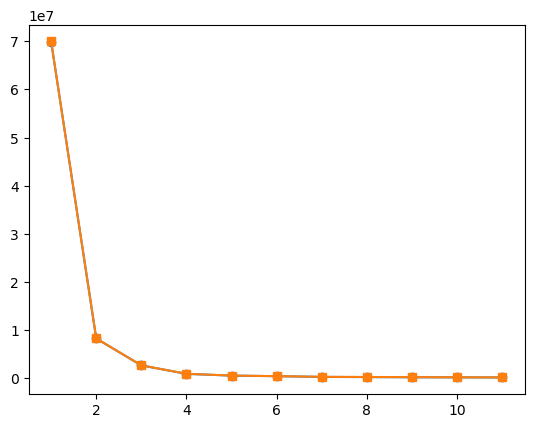

In [120]:
# Composite plot to contrast the Elbow curves
plt.plot(k_pca, inertia_pca, marker='o', label='PCA Elbow Curve')
plt.plot(k, inertia, marker='s', label='Original Elbow Curve')

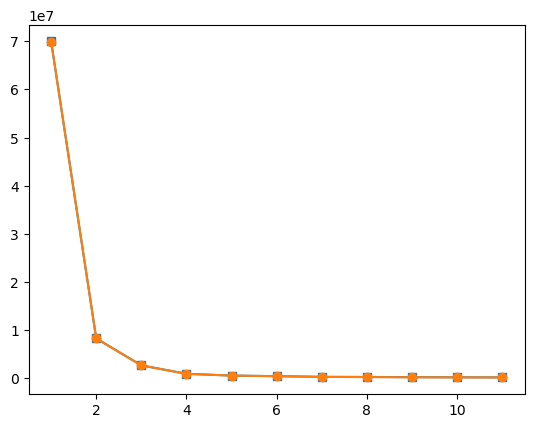

In [121]:
# Checking to see if the other plot is under the first one
plt.plot(k, inertia, marker='s', label='Original Elbow Curve')
plt.plot(k_pca, inertia_pca, marker='o', label='PCA Elbow Curve')
# Conclusion: the lines are identical

In [122]:
# Composite plot to contrast the clusters
scatter_original = market_copy.hvplot.scatter(x="price_change_percentage_24h", y="price_change_percentage_7d", by='predictions', hover_cols=["coin_id"])
scatter_pca = pca_df_copy.hvplot.scatter(x="PCA1", y="PCA2", by='pca_predictions', hover_cols=["coin_id"])
composite_scatter = scatter_original * scatter_pca
composite_scatter

:Overlay
   .NdOverlay.I  :NdOverlay   [predictions]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [pca_predictions]
      :Scatter   [PCA1]   (PCA2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 